# Grafico Mod_dist vs Redshift.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log,sqrt
import scipy.special as sc 
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('dati.csv')

In [3]:
df

,nome_SN,redshift,mod_dist,mod_dist_err,unknown,Unnamed: 5
0,1993ah,0.028488,35.346583,0.223906,0.128419,NaN
1,1993ag,0.050043,36.682368,0.166829,0.128419,NaN
2,1993o,0.052926,36.817691,0.155756,0.128419,NaN
3,1993b,0.070086,37.446737,0.158467,0.128419,NaN
4,1992bs,0.062668,37.483409,0.156099,0.128419,NaN
...,...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015,NaN
576,D-006,1.315000,44.971358,0.187509,0.551672,NaN
577,P-009,0.821000,43.640939,0.194014,0.551672,NaN
578,R-012,1.215000,45.246521,0.560317,0.000148,NaN


In [4]:
plt.figure(figsize=(15,10),dpi = 1000)
plt.plot(df['redshift'],df['mod_dist'],'o')
plt.title('Grafico Mod_dist vs redshift')
plt.xlabel('Redshift')
plt.ylabel('Mod_dist')
plt.show()

CURVE FIT 25 + 5 LOG(dl(z))

In [5]:
x,y,Dy = (df['redshift'],df['mod_dist'],df['mod_dist_err'])

In [6]:
# attraverso la funzione ipergeometrica trovo l'espressione della luminosità DL(z):
# B è il parametro da stimare ovvero omegaM. z è il redshift.
def geom_1(b):
    return float(sc.hyp2f1(1/6,1/2,7/6, (b - 1)/b))
def geom_2(b,z):
    return float(sc.hyp2f1(1/6,1/2,7/6, ((b - 1)/b) * (1 + z) ** -3))


In [7]:
# velocità della luce in km/s:
c = 30000000
#Luminosità:
def Dl(a,b,z):
     return float(((c/a) * (2 * (1 + z))/sqrt(a)) * (2 * geom_1(b) - 1/sqrt(1 + z) * geom_2(b,z)))

In [8]:
# definisco la funzione che poi minimizzo attraverso il metodo dei minimi quadrati:

In [9]:
def func(x, A, B):
    return float(25 + 5 * log(Dl(A,B,x)))

In [10]:
xdata = df['redshift'].astype(float)
ydata = df['mod_dist'].astype(float)
sigmas = df['mod_dist_err'].astype(float)

C:\Users\dnlan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


TypeError: cannot convert the series to <class 'float'>

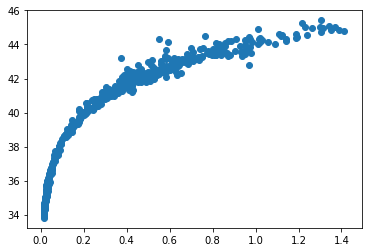

In [11]:
plt.scatter(x=xdata, y=ydata, label='data')
popt, pcov = curve_fit(func, xdata, ydata, p0=[68,0], sigma=sigmas, absolute_sigma=True)
print('fit without bounds')
print(popt)
print(pcov)
print("a = {:.3f}+/-{:.3f}".format(popt[0],math.sqrt(pcov[0,0])))
print("b = {:.3f}+/-{:.3f}".format(popt[1],math.sqrt(pcov[1,1])))
plt.errorbar(xdata,ydata,sigmas,linestyle = '', color = 'black', marker = 'o')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a={:5.3f}, b={:5.3f}'.format(*popt))
popt, pcov = curve_fit(func, xdata, ydata, sigma=sigmas, p0=[68,0], bounds=([0, 0], [3., 1.]), absolute_sigma=True)
print('fit with bounds')
print("fit parameters: ", popt)
print("cov matrix:", pcov)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('redshift')
plt.ylabel('mod_dist')
plt.legend()
plt.show()